_This document is part of [doper](https://github.com/mwermelinger/doper),
a collection of domain-oriented programming exercises._

# 1 Mono sound

This is the first part of an introduction to generating, manipulating, playing
and displaying sound waves in Jupyter notebooks.

Section 1.5 has an exercise asking you to apply a fade out effect to a sound.
I removed my solution code but kept the resulting sound and images,
so that you can hear and see what your code should generate.
(You may need to open this notebook in trusted mode to hear the sounds.)
When editing this notebook, only run one code cell at a time.
If you run all cells you will lose the pre-generated sounds and images.

## 1.1 Introduction

Sound is usually perceived by vibrations of air molecules on our eardrum,
which is a membrane. Our ear translates the movement of the eardrum into
electrical signals for our brain. Microphones and loudspeakers also use
membranes to capture or generate sound: a microphone converts the membrane's
movements into electrical signals while a loudspeaker uses electrical signals
to make the membrane move which in turn makes the air vibrate.

A higher pitched sound will make the membrane vibrate more rapidly.
The number of vibrations per second is the **frequency** of the sound.
Frequency is measured in **Hertz** (abbreviated Hz).
Humans can hear frequencies from 20 to 20,000 Hz, roughly.

A louder sound will make the membrane vibrate more widely, i.e.
it will be displaced further from its resting position.
The displacement is the **volume** of the sound.

To record sound in digital form, the displacement of the microphone membrane
is measured at regular points in time. Each **sample** is a number indicating
how much the membrane is displaced from its resting position.
The number 0 indicates the membrane is at rest;
positive numbers indicate displacement in one direction,
negative numbers in the other.

**Mono** sound is recorded with a single microphone and can therefore be
represented with a single list of numbers.
We will use floating-point numbers in the range from -1 to +1.

The **sampling rate** is the number of samples per second.
The higher the sampling rate, the more faithful the recording is
to the original sound, but also the more memory is needed to store all samples.
There is also a relation between sampling rate and frequency:
the highest frequency that can be recorded is half the sampling rate.
To capture the highest frequencies heard by humans,
CD-quality music is recorded at 44,100 samples per second.

## 1.2 The sound of silence

Let's suppose we want to generate CD-quality silence:
we must create 44,100 samples for each second of silence.
Silence is the absence of air vibrations, so all samples are the number 0,
to keep the loudspeaker's membrane in its resting position.

Once we have generated the samples, we can use Jupyter's audio player to hear them.
We must tell the player at which rate to play the samples.

I created a file `sound.py` in the same folder as this notebook.
It includes a function `play` with two inputs: a list of samples
(floats in the range -1.0 to +1.0) and an integer rate.
The function creates a Jupyter audio player that plays the samples at the given rate.

In [1]:
from sound import *

rate = 44100                        # samples per second
duration = 2                        # seconds
silence = [0.0] * rate * duration   # the sound samples
play(silence, rate)

Note that the sample values are 0.0 (a float) and not 0 (an integer).
If you click on the play button, you won't hear anything for two seconds.

what do you think you will hear? (Make a guess before playing the new sound.)

In [2]:
new_sound = [1.0] * rate * duration
play(new_sound, rate)

You should hear two short 'bumps', at the start and at the end.
That's the loudspeaker membrane going from the rest position
to maximum displacement and back to the rest position.
In between those sounds, there is silence because the membrane isn't vibrating:
it's always in the same position.

## 1.3 Making noise

The simplest way to generate noise is to make the membrane vibrate randomly.
This is achieved by generating random floating-point numbers in the allowed range.

In [3]:
from random import uniform

samples = rate * duration       # number of samples required
noise = []
for sample in range(samples):
    noise.append(uniform(-1.0, 1.0))
play(noise, rate)

What will you hear if the noise is played at a quarter of the sampling rate?
(Again, make a hypothesis before listening.)

In [4]:
play(noise, rate // 4)

Playing the same number of samples at a quarter of the rate takes four times longer:
eight seconds instead of two. More interestingly, the noise has a lower pitch.
As I mentioned previously, the highest possible frequency is half the sampling rate,
so reducing the rate also reduces the frequency of the sound.

## 1.4 Sound waves

Besides being heard, the vibration of the loudspeaker's membrane can also be seen,
by plotting the values of the samples with function `show` from file `sound.py`.

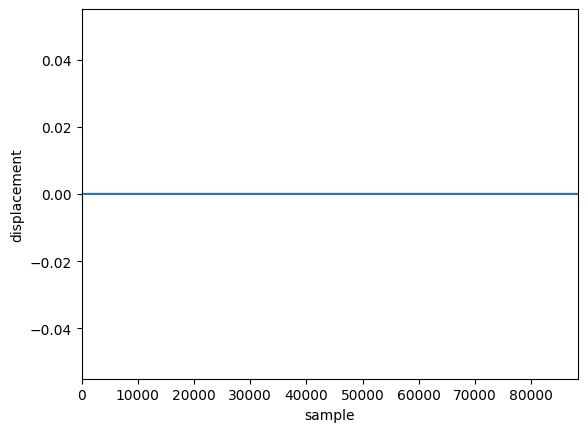

In [5]:
show(silence)

The sound wave of silence is flat,
because all samples have the same value.
The sound wave of noise should be more interesting.

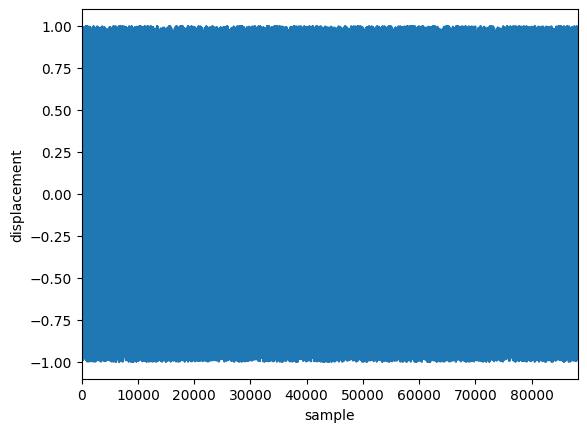

In [6]:
show(noise)

Alas, it isn't. With 88,200 samples plotted,
it's impossible to see the individual displacements,
so let's plot only a few samples.
The `show` function can be given the first and last samples to be displayed.

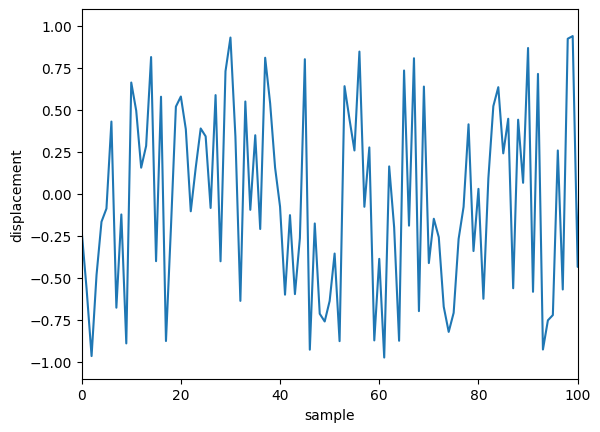

In [7]:
show(noise, 0, 100)     # show samples 0 to 100

As expected, the plot shows the random movement of the membrane.

## 1.5 Fade out
*The following exercise is based on Part 2 of Daniel Zingaro's*
[Stereo Sound Processing](https://www.danielzingaro.com/sound_proc2/assignment.html)
*assignment.*

A popular effect is to fade out the music at the end,
which means to gradually reduce its volume.
This can be achieved by multiplying each sample by a gradually reducing factor.
For example, if a sound has 1000 samples (numbered 0 to 999) and
the fade out is to occur over the last 100 samples, then
the volume must decrease by 1% per sample:

- the value of sample 900 is multiplied by 1
- the value of sample 901 is multiplied by 0.99
- the value of sample 902 is multiplied by 0.98
- ...
- the value of sample 998 is multiplied by 0.02
- the value of sample 999 is multiplied by 0.01

Likewise, if the fade out is over the last 4 samples, then:

- the value of sample 996 is multiplied by 1
- the value of sample 997 is multiplied by 0.75
- the value of sample 998 is multiplied by 0.50
- the value of sample 999 is multiplied by 0.25

In this way the volume goes uniformly towards zero (when the sound ends)
over the indicated number of samples.

Complete the next function. Note that you must *not* change the input sound.

In [8]:
def fade_out(sound: list, n: int) -> list:
    """Return a copy of the sound, with the last n samples faded out.

    You can assume that `sound` has more than n samples and that n > 0.
    """
    pass

The next three cells show examples of fading out the `noise` sound clip.
Look at the sound waves, hear the faded sounds, and then run the cells to check
that your implementation produces the same 'dampening' of the sound waves.

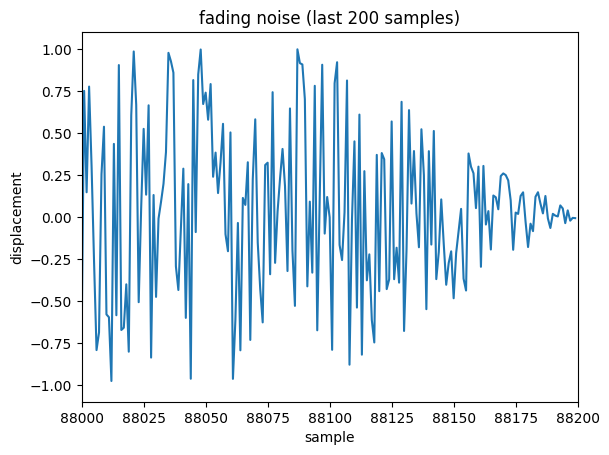

In [9]:
fading = fade_out(noise, 100)   # fade out the last 100 samples
length = len(noise)             # total number of samples
# function `show` can have an argument with the figure's title
show(fading, length-200, length, 'fading noise (last 200 samples)')

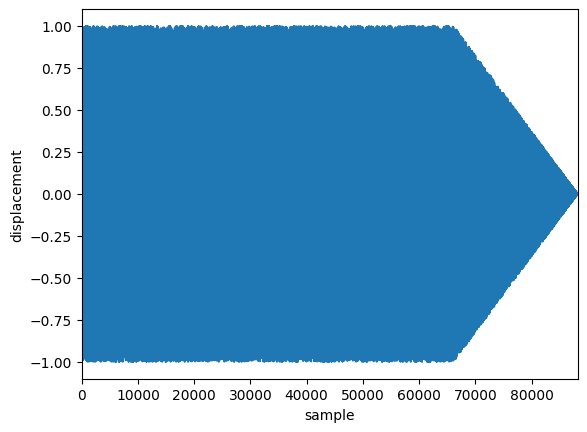

In [10]:
fading = fade_out(noise, length // 4) # fade out final quarter of the sound
show(fading)
play(fading, rate)

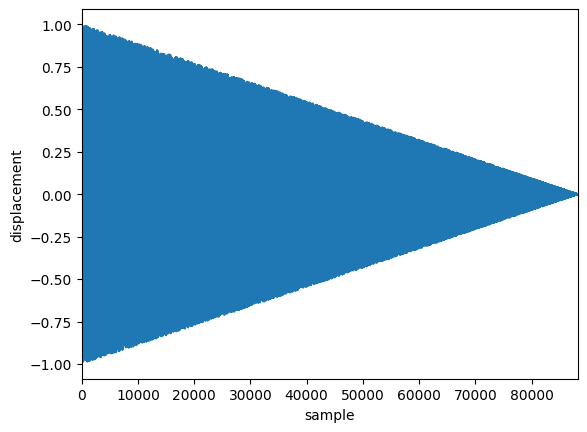

In [11]:
fading = fade_out(noise, length) # fade out since the start
show(fading)
play(fading, rate)

**Exercise**: Write and test a `fade_in(sound, n)` function that
gradually increases the volume over the first `n` samples of `sound`.